In [2]:
#importing Libraries
import seaborn as sns
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [4]:
df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

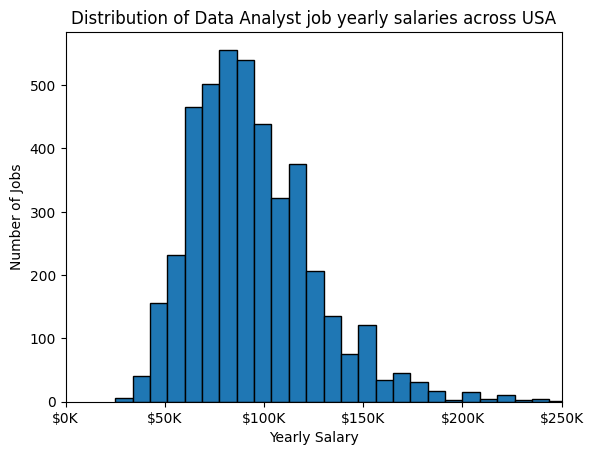

In [5]:
df_DA_USA['salary_year_avg'].plot(kind= 'hist', bins=40, edgecolor= 'black')

plt.xlim(0, 250000)

ax= plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of Data Analyst job yearly salaries across USA' )
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()



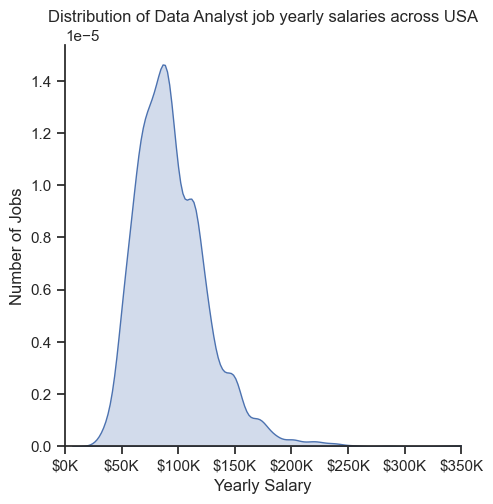

In [9]:
sns.displot(df_DA_USA['salary_year_avg'], kind= 'kde', fill =True)
sns.set_theme(style= 'ticks')

plt.xlim(0, 350000)

ax= plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of Data Analyst job yearly salaries across USA' )
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()